In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly_express as px

In [3]:
# Uppgift 2

# Read data from vaccin.xlsx    
vaccinerade_kommun_alder = pd.read_excel("data\\vaccin.xlsx", sheet_name="Vaccinerade kommun och ålder")  

In [4]:
# Exploring dataset

vaccinerade_kommun_alder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Län                  2900 non-null   int64  
 1   Län_namn             2900 non-null   object 
 2   Kommun               2900 non-null   int64  
 3   Kommun_namn          2900 non-null   object 
 4   Ålder                2900 non-null   object 
 5   Befolkning           2900 non-null   int64  
 6   Antal minst 1 dos    2900 non-null   int64  
 7   Antal minst 2 doser  2900 non-null   int64  
 8   Antal 3 doser        2320 non-null   float64
 9   Antal 4 doser        870 non-null    float64
 10  Andel minst 1 dos    2900 non-null   float64
 11  Andel minst 2 doser  2900 non-null   float64
 12  Andel 3 doser        2320 non-null   float64
 13  Andel 4 doser        870 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 317.3+ KB


In [5]:
#a) Hur många län finns representerade i datasetet? 

antal_lan = vaccinerade_kommun_alder["Län_namn"].nunique()

print(f"Det finns {antal_lan} län representerade i datasetet")

Det finns 21 län representerade i datasetet


In [6]:
#b) Hur många kommuner finns representerade i datasetet?

antal_kommuner = vaccinerade_kommun_alder["Kommun_namn"].nunique()

print(f"Det finns {antal_kommuner} kommuner representerade i datasetet")



Det finns 290 kommuner representerade i datasetet


In [7]:
#c) Hur stor är befolkningen som är representerad i datasetet?

befolkning = vaccinerade_kommun_alder["Befolkning"].sum()

print(f"Det finns {befolkning:,} människor representerade i datasetet")


Det finns 9,092,790 människor representerade i datasetet


In [8]:
# Showing the columns of the dataset to use in the next assignment
vaccinerade_kommun_alder.head()

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,NaN,0.730275,0.667812,0.292738,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5542,5240,2878.0,NaN,0.755865,0.714675,0.392526,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5592,5429,3719.0,NaN,0.805068,0.781601,0.535416,NaN


In [10]:
#d) Beräkna hur många barn under 18 år det finns i Sverige baserat på det här datasetet. Du får leta upp
# statistik på hur stor totala befolkningen är i Sverige.

# Hela befolkningen från 0 och uppåt
total_befolkning_2022  = 10_521_556     # https://www.scb.se/hitta-statistik/sverige-i-siffror/manniskorna-i-sverige/sveriges-befolkning/#:~:text=2022%20var%20folkm%C3%A4ngden%20i%20Sverige,fler%20har%20invandrat%20%C3%A4n%20utvandrat.  

# Totala antal under 18 fås genom att subtrahera total befolkning med befolkning över 18 i datasetet
befolkning_below_18 = total_befolkning_2022 - vaccinerade_kommun_alder[~vaccinerade_kommun_alder["Ålder"].isin(["12-15", "16-17"])]["Befolkning"].sum()

print(f"Utifrån detta dataset och Sveriges totala befolkning 2022 så är {befolkning_below_18:,} individer under 18 år")


Utifrån detta dataset och Sveriges totala befolkning 2022 så är 2,174,136 individer under 18 år


In [15]:
#e) Rita ett diagram som visar på åldersfördelningen av Sveriges befolkning.

# Grouping the dataset for plotting 
ages_population = pd.DataFrame(vaccinerade_kommun_alder.groupby("Ålder")["Befolkning"].sum())

In [16]:
# Draw a diagram in plotly express showing the age distribution of Sweden's population.

fig = px.bar(ages_population, x=ages_population.index, y='Befolkning')
fig.show()

C:\Users\yonis\AppData\Local\Temp\ipykernel_13200\4162368274.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\yonis\AppData\Local\Temp\ipykernel_13200\4162368274.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\yonis\AppData\Local\Temp\ipykernel_13200\4162368274.py:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



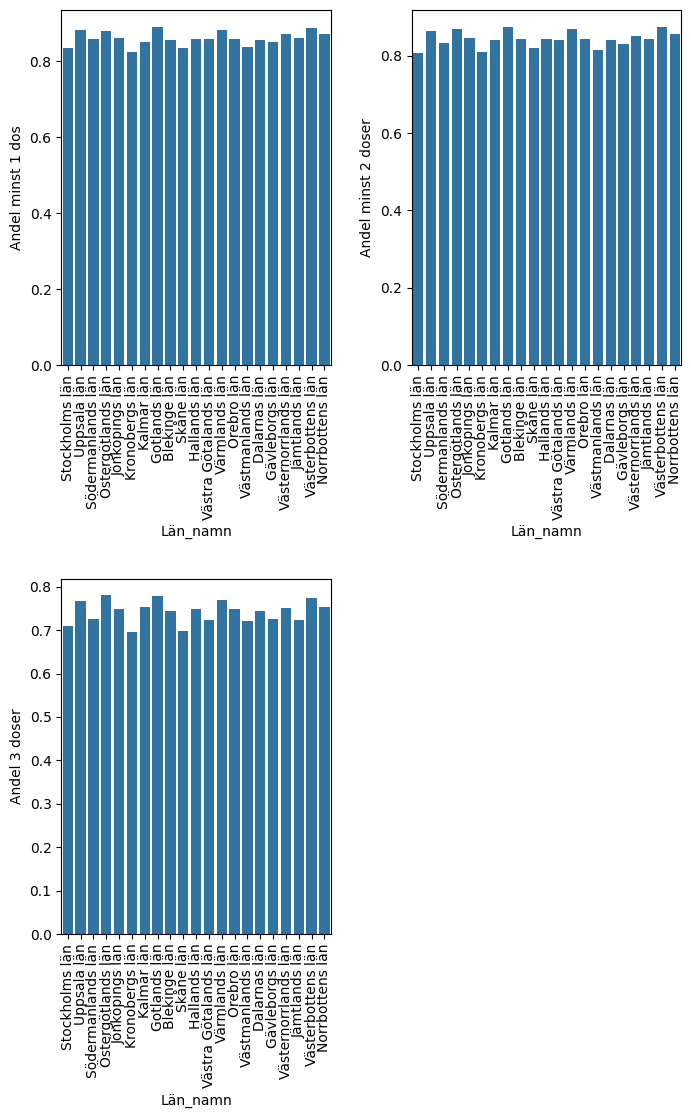

In [17]:
#f) Rita stapeldiagram för andel med minst 1 dos per län, andel två doser per län och andel tre doser per
# län 

# Drawing barplots in seaborn for ratio och vaccinated people with different doses as subplots on the same figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 12))

sns.barplot(x="Län_namn", y="Andel minst 1 dos", data=vaccinerade_kommun_alder, errorbar=None, ax=axes[0, 0])
sns.barplot(x="Län_namn", y="Andel minst 2 doser", data=vaccinerade_kommun_alder, errorbar=None, ax=axes[0, 1])
sns.barplot(x="Län_namn", y="Andel 3 doser", data=vaccinerade_kommun_alder, errorbar=None, ax=axes[1, 0])

# Rotating the x-labels for all plots 90 degrees to make them more readable
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# Hide the last empty subplot
axes[1, 1].axis("off")


# increase the space between the subplots
plt.subplots_adjust(hspace=0.6, wspace=0.3)

plt.show()

In [ ]:
#f) Tag Västra Götalands län och Stockholms län och rita diagram över andelen vaccinerade med minst 1 dos,
# två doser, tre doser och fyra doser.

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8, 12))

sns.barplot(x="Län_namn", y="Andel minst 1 dos", data=vaccinerade_kommun_alder, errorbar=None, ax=ax1)
sns.barplot(x="Län_namn", y="Andel minst 2 doser", data=vaccinerade_kommun_alder, errorbar=None, ax=ax2)
sns.barplot(x="Län_namn", y="Andel 3 doser", data=vaccinerade_kommun_alder, errorbar=None, ax=ax3)

# Rotating the x-labels for all plots 90 degrees to make them more readable
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)

# Hide the last empty subplot
ax4.axis('off')

plt.show()


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 12))

sns.barplot(x="Län_namn", y="Andel minst 1 dos", data=vaccinerade_kommun_alder, errorbar=None, ax=axes[0, 0])
sns.barplot(x="Län_namn", y="Andel minst 2 doser", data=vaccinerade_kommun_alder, errorbar=None, ax=axes[0, 1])
sns.barplot(x="Län_namn", y="Andel 3 doser", data=vaccinerade_kommun_alder, errorbar=None, ax=axes[1, 0])

# Hide the fourth
axes[1, 1].axis('off')

# Set x-axis labels rotation for each subplot # Ok enligt Fredrik, Function lr loop, gör finare
axes[0, 0].set_xticks(axes[0, 0].get_xticks())
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
axes[0, 0].set_xlabel("Län")
axes[0, 0].tick_params(axis = 'x', labelsize = 8)

axes[0, 1].set_xticks(axes[0, 1].get_xticks())
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)
axes[0, 1].set_xlabel("Län")
axes[0, 1].tick_params(axis = 'x', labelsize = 8)

axes[1, 0].set_xticks(axes[1, 0].get_xticks())
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)
axes[1, 0].set_xlabel("Län")
axes[1, 0].tick_params(axis = 'x', labelsize = 8)

# Adjust layout
plt.subplots_adjust(wspace=0.5, hspace=0.6)

plt.show()

In [ ]:
# g) Tag Västra Götalands län och Stockholms län och rita diagram över andelen vaccinerade med minst 1 dos,
# två doser, tre doser och fyra doser.



# Se över skala så att det visas som 0 - 1 på y - axel


fig, axes = plt.subplots(2, 2, figsize=(8, 12))

vaccinerade_sthlm_vgt = vaccinerade_kommun_alder[vaccinerade_kommun_alder["Län_namn"].isin(["Stockholms län","Västra Götalands län"])]

sns.barplot(x="Län_namn", y="Andel minst 1 dos", data=vaccinerade_sthlm_vgt, errorbar=None, ax=axes[0, 0])
sns.barplot(x="Län_namn", y="Andel minst 2 doser", data=vaccinerade_sthlm_vgt, errorbar=None, ax=axes[0, 1])
sns.barplot(x="Län_namn", y="Andel 3 doser", data=vaccinerade_sthlm_vgt, errorbar=None, ax=axes[1, 0])

# Hide the fourth
axes[1, 1].axis('off')

# Set x-axis labels rotation for each subplot      # Funktion
axes[0, 0].set_xticks(axes[0, 0].get_xticks())
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
axes[0, 0].set_xlabel("Län")
axes[0, 0].tick_params(axis = 'x', labelsize = 8)

axes[0, 1].set_xticks(axes[0, 1].get_xticks())
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)
axes[0, 1].set_xlabel("Län")
axes[0, 1].tick_params(axis = 'x', labelsize = 8)

axes[1, 0].set_xticks(axes[1, 0].get_xticks())
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)
axes[1, 0].set_xlabel("Län")
axes[1, 0].tick_params(axis = 'x', labelsize = 8)

# Adjust layout
plt.subplots_adjust(wspace=0.5, hspace=0.6)
plt.show()

